In [1]:
import numpy as np
import sys
import re
import os
import cygnus_lib as cy
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import mylib as my
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
import scipy.ndimage
from scipy.stats import chisquare

import pandas as pd
import time
from IPython import display

%matplotlib inline
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
plt.rcParams['font.serif'] = ['Bitstream Vera Sans']
x_resolution = y_resolution = 2048

# LEMON images analisys

In [3]:
# run info and selection
run = 58
scopeT = True
dataSelection = 'BTF'
file_in_dir=cy.swift_listdir(cy.file2FullPathCygnus(dataSelection, run, 'H5'))
max_image = np.size(file_in_dir)
print ("# of Image Files: %d" % (np.size(file_in_dir)))
try:
    file_in_dir=cy.swift_listdir(cy.file2FullPathCygnus(dataSelection, run, 'SCO'))
    print ("# of Scope Files: %d" % (np.size(file_in_dir)))
except:
    print ("No data Scope")
    scopeT = False

# of Image Files: 100
# of Scope Files: 0


# Events run display (set run number)
display all images and scope traces in a run.
Press STOP to interrupt 

In [55]:
if scopeT:
    my.set_atlas_style('xlong')
else:
    my.set_atlas_style('large')
iTr = 0

while True:
    try:

        dataImg = cy.swift_read_image_h5(cy.imageFile2FullPathCygnus(dataSelection, run, iTr))
        #
        #dataImg[dataImg>115]=int(dataImg.mean())
        #
        if scopeT:
            fig, ax = plt.subplots(1,2)
            ax[0].set_title("I%d Run%d" % (iTr, run))
            ax[0].imshow(dataImg, cmap="gray", vmin=85,vmax=120)
        
            try:
                t, a  = cy.ReadScopeTrace(cy.scopeFile2FullPathCygnus(dataSelection, run, iTr, 1))
                ax[1].plot(t, a, 'y:.', label='Trigger')
                ax[1] = ax[1].twinx()
            except:
                print("Error reading file: %s" % 
                      cy.scopeFile2FullPathCygnus(dataSelection, run, iTr, 1))
            try:
                t, a  = cy.ReadScopeTrace(cy.scopeFile2FullPathCygnus(dataSelection, run, iTr, 3))
                ax[1].plot(t, a, 'b-', label='PMT', alpha=0.7)
                ax[1].set_xlabel('Time [s]')
                ax[1].set_ylabel('Amplitude [V]')
    #            plt.ylim((-1,0.1))
            except:
                print("Error reading file: %s" % 
                      cy.scopeFile2FullPathCygnus(dataSelection, run, iTr, 3))
            try:
                t, a  = cy.ReadScopeTrace(cy.scopeFile2FullPathCygnus(dataSelection, run, iTr, 4))
                ax[1].plot(t, a, 'r-', label='Calo', alpha=0.7)
                ax[1].set_ylabel('Amplitude [V]')
                ax[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
            except:
                print("Error reading file: %s" % 
                      cy.scopeFile2FullPathCygnus(dataSelection, run, iTr, 4))
        else:
            plt.title("I%d Run%d" % (iTr, run))
            plt.imshow(dataImg, cmap="gray", vmin=85,vmax=140)

        if scopeT:
            fig.tight_layout()
        plt.plot()
        display.display(plt.show())
        display.clear_output(wait=True)
        
        if iTr == max_image-1:
            break
        iTr+=1
        time.sleep(0)
    except KeyboardInterrupt:
        break

Error reading file: Data/BTF/Data_Scope/Run058/C1wave00012.txt
Error reading file: Data/BTF/Data_Scope/Run058/C3wave00012.txt
Error reading file: Data/BTF/Data_Scope/Run058/C4wave00012.txt


# Single event display (set run and track number)

Error reading file: Data/BTF/Data_Scope/Run058/C1wave00005.txt
Error reading file: Data/BTF/Data_Scope/Run058/C3wave00005.txt
Error reading file: Data/BTF/Data_Scope/Run058/C4wave00005.txt


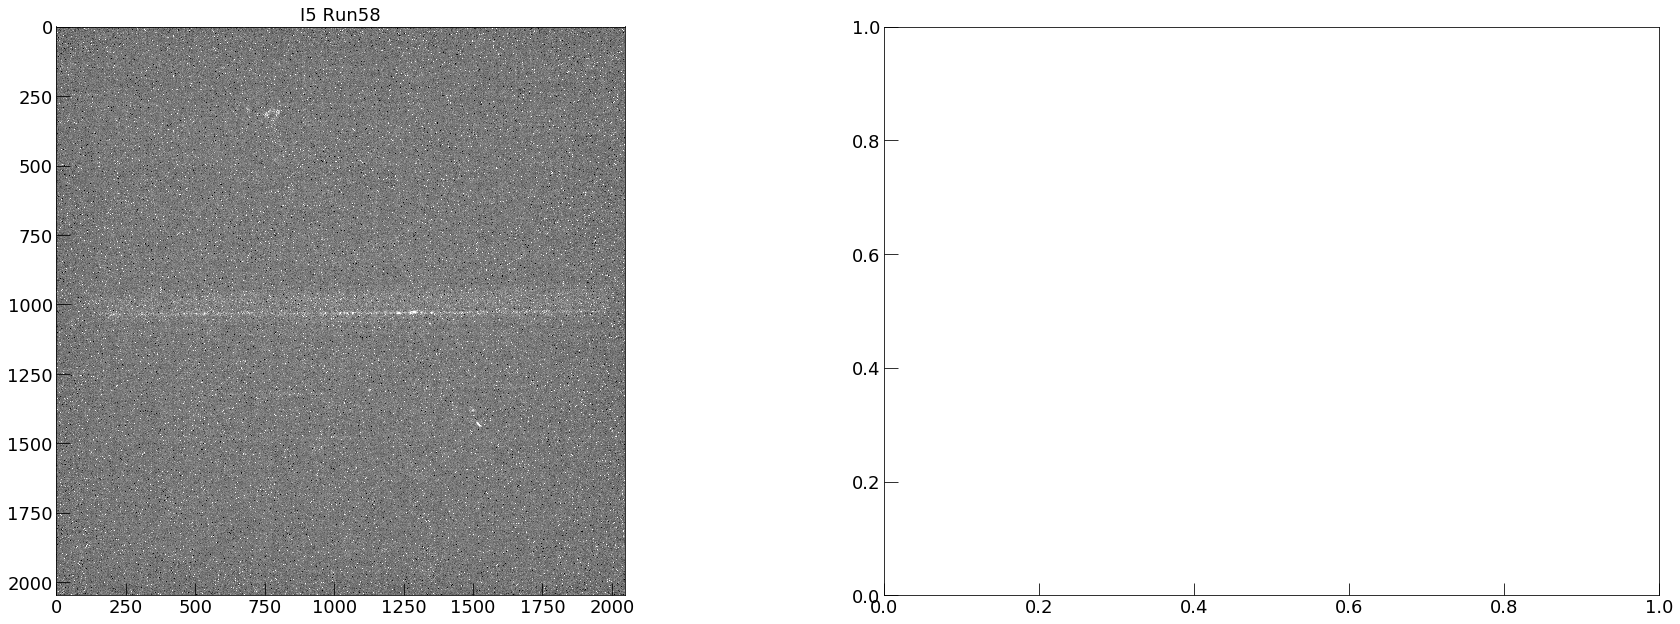

In [56]:
my.set_atlas_style('xlong')

# single events (traccia) run display 
dataSelection = 'BTF'
run = 58
traccia = 5
fig, ax = plt.subplots(1,2)
ax[0].set_title("I%d Run%d" % (traccia, run))
ax[0].imshow(cy.swift_read_image_h5(cy.imageFile2FullPathCygnus(dataSelection, run, iTr)), 
                                cmap="gray", vmin=85,vmax=120)
try:
    t, a  = cy.ReadScopeTrace(cy.scopeFile2FullPathCygnus(dataSelection, run, traccia, 1))
    ax[1].plot(t, a, 'y:.', label='Trigger')
    ax[1] = ax[1].twinx()
except:
    print("Error reading file: %s" % cy.scopeFile2FullPathCygnus(dataSelection, run, traccia, 1))
try:
    t, a  = cy.ReadScopeTrace(cy.scopeFile2FullPathCygnus(dataSelection, run, traccia, 3))
    ax[1].plot(t, a, 'b-', label='PMT', alpha=0.7)
    ax[1].set_xlabel('Time [s]')
    ax[1].set_ylabel('Amplitude [V]')
except:
    print("Error reading file: %s" % cy.scopeFile2FullPathCygnus(dataSelection, run, traccia, 3))
try:
    t, a  = cy.ReadScopeTrace(cy.scopeFile2FullPathCygnus(dataSelection, run, traccia, 4))
    ax[1].plot(t, a, 'r-', label='Calo', alpha=0.7)
    ax[1].set_ylabel('Amplitude [V]')
    ax[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    fig.tight_layout()
    plt.plot()
except:
    print("Error reading file: %s" % cy.scopeFile2FullPathCygnus(dataSelection, run, traccia, 4))
# plt.savefig('/Volumes/Mac_DATA/Cygnus/Data/dataSelection/Data_Image/I%dRun%dS.png' % (traccia, run))

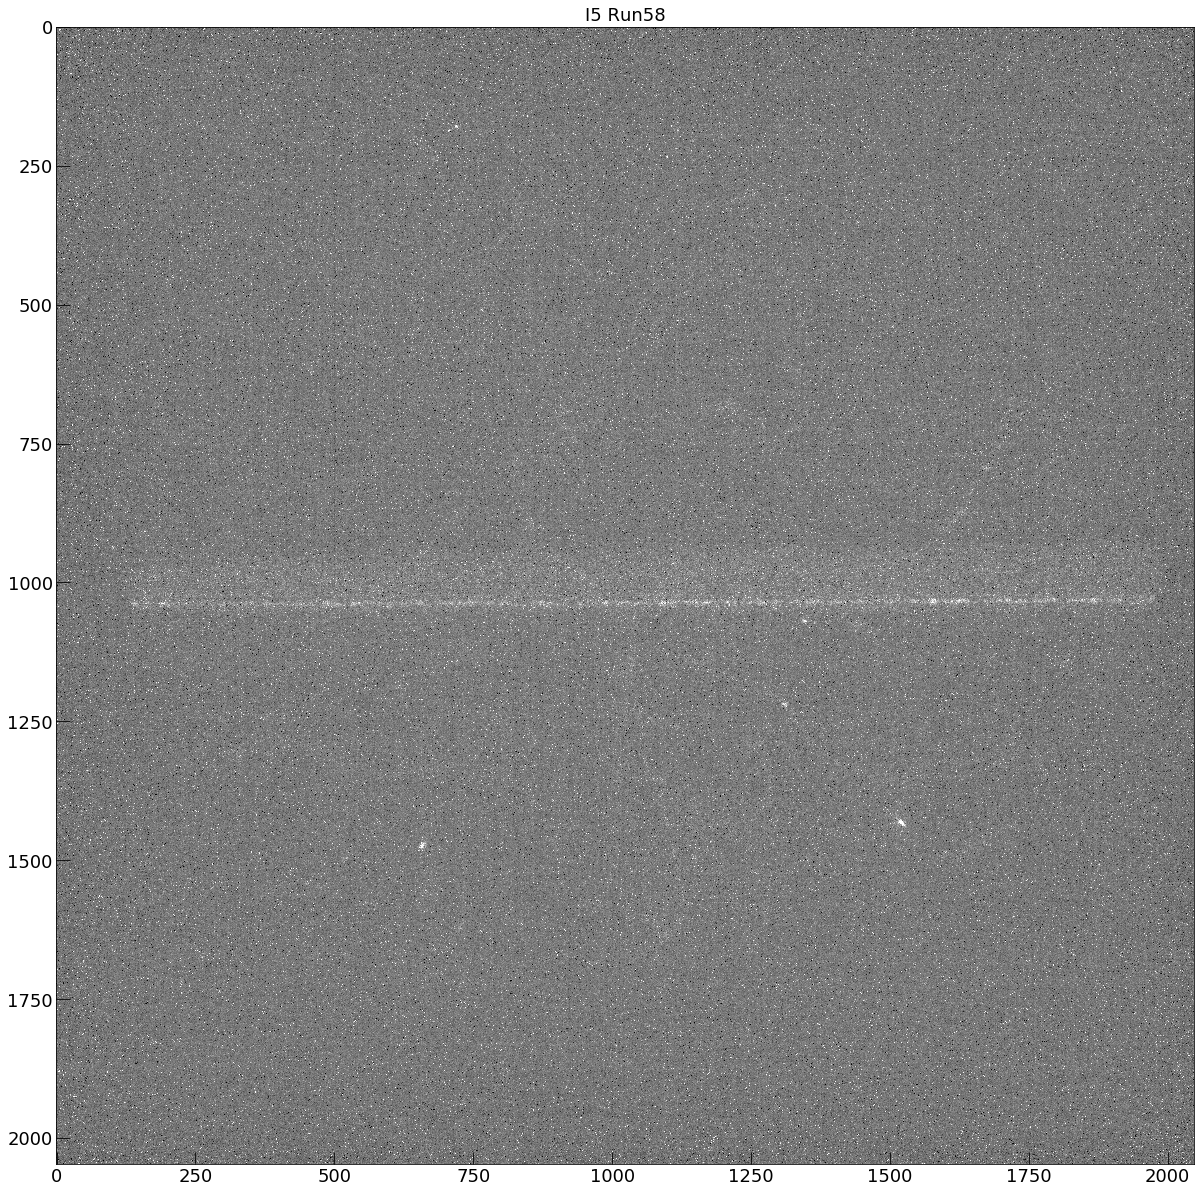

2880
130
2338
147


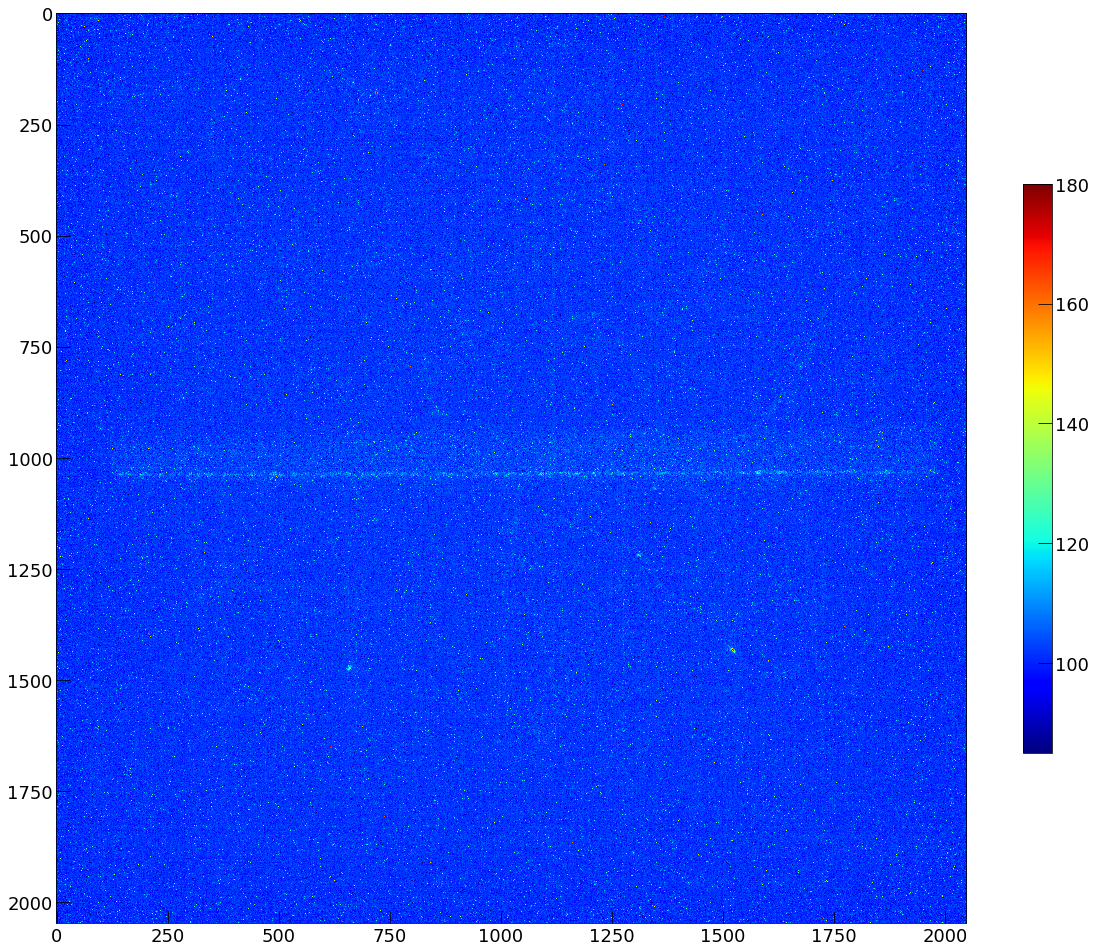

In [76]:
my.set_atlas_style('large')
#run = 740
#traccia = 3
#dataSelection = 'LABOct2017'
#run = 494
#traccia = 1
#dataSelection = 'LABOct2017'
#run = 66
#traccia = 1
#dataSelection = 'BTF_2017-2'
#run = 813
#traccia = 292
#dataSelection = 'LABOct2017'
#run = 813
#traccia = 71
#dataSelection = 'LABOct2017'
#run = 811  # esposizione lunga
#traccia = 1
#dataSelection = 'LABOct2017'
run = 58
traccia = 5
dataSelection = 'BTF'
pathI        = cy.imageFile2FullPathCygnus(dataSelection, run, traccia)
imageBare    = cy.swift_read_image_h5(cy.imageFile2FullPathCygnus(dataSelection, run, traccia))
plt.title("I%d Run%d" % (traccia, run))
image = cy.swift_read_image_h5(cy.imageFile2FullPathCygnus(dataSelection, run, traccia))
#
#image[image>115]=int(image.mean()) # spegni scariche....
#
plt.imshow(image,cmap="gray", vmin=85,vmax=120)
plt.show()
my.set_atlas_style('large')
fig, ax = plt.subplots()
#im = ax.imshow(image, vmin=85,vmax=200, cmap='jet')
plt.imshow(image, vmin=85,vmax=180, cmap='jet')
plt.colorbar(shrink=0.5)
print(image[1330:1370,390:430].sum()-100*((1330-1370)*(390-430)))
print(image[1330:1370,390:430].max())

print(image[945:970,1375:1405].sum()-100*((945-970)*(1375-1405)))
print(image[945:970,1375:1405].max())
# figura 3 run 740 alfettissima [945:970,1375:1405]
# figura 3 run 740 alfetta [1330:1370,390:430]
# figura 3 run 740 protone [1500:1750,1250:1500]
# figura 3 run 740 alfona [600:750,700:1000]
#fig.colorbar(im, ax=ax)
# plt.savefig('/Volumes/Mac_DATA/Cygnus/Data/dataSelection/Data_Image/I%dRun%d.png' % (traccia, run))
plt.show()

Tmin: 1.41, Tmax: 1.73, Tstep: 100$
y0: 1037.68, y1: 1037.68, T: 1.57 DT:0.00e+00
y0: 1056.85, y1: 1020.90, T: 1.55 DT:1.76e-02


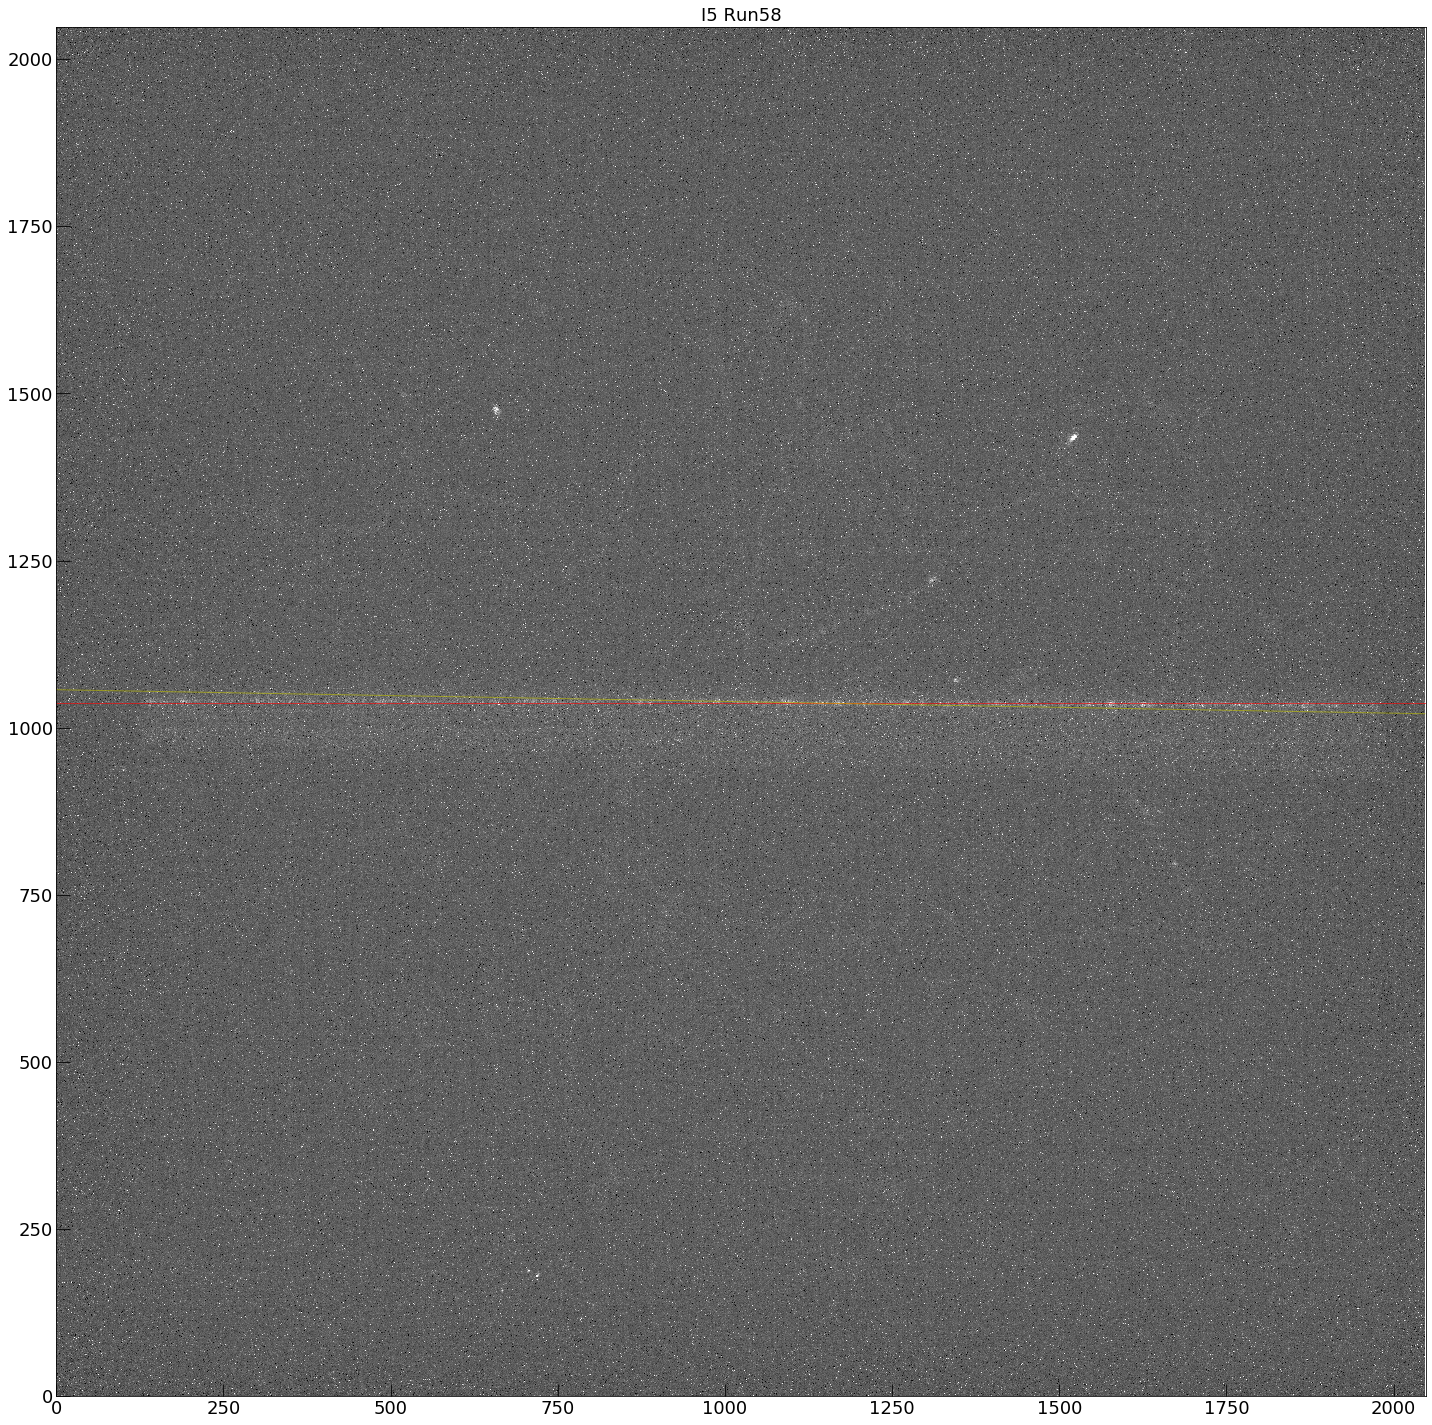

In [77]:

my.set_atlas_style('large')
# traccia tipica di neutroni...
run = 494
traccia = 1
dataSelection = 'LABOct2017'

#run = 66
#traccia = 1
#dataSelection = 'BTF_2017-2'

#run = 813
#traccia = 292
#dataSelection = 'LABOct2017'

run = 813
traccia = 71
dataSelection = 'LABOct2017'

run = 740
traccia = 3
dataSelection = 'LABOct2017'

run = 58
traccia = 5
dataSelection = 'BTF'


#
# hough trasform find track in the image...
#

cimin, cimax = 103, 180  # valori del cut sull'imagine
rescale      = 128       # binnagio finale immagine (deve essre un sottomultipli della 2**2 risluzione di partenza)
thC          = 2.        # vicinanza dei pixel nel cluster

col    = ('b.', 'r.', 'c.', 'm.', 'y.', 'k.', 'g.') 
c = ['-r', '-y', '-b', '-g']
# optimized for horizontal track in dtheta
dtheta=np.pi/20
tvt = np.linspace(np.pi/2-dtheta, np.pi/2+dtheta, num=100)
print ("Tmin: %.2f, Tmax: %.2f, Tstep: %d$" % (np.min(tvt), np.max(tvt), np.size(tvt)))
fig, ax = plt.subplots()
imageBare =cy.swift_read_image_h5(cy.imageFile2FullPathCygnus(dataSelection, run, traccia))
##################### ATTENZIONE spegni scariche..
#imageBare[imageBare>115]=int(imageBare.mean()) # spegni scariche....
imageBare=imageBare
#####################
# scale     = (imageBare.shape[1]/rescale)
# imgRes    = my.rebin(imageBare, (rescale, rescale))
# edges     = (imgRes > cimin) & (imgRes < cimax)            # soglia del contenuto dei pixel
# points    = np.array(np.nonzero(edges)).T.astype(float)
# C         = my.NNClustering(points, thC)
# dCloseT, iCloseT, infoCloseT = my.NNClusteringInfo(C)


image = imageBare > 110
# standard "image" al posto di "edges"
h, theta, d = hough_line(image) #### (image, tvt) per raffinare angolo, ma centrato nell'orizzontale.
ax.imshow(imageBare, vmin=85, vmax=130,  cmap="gray")
k = 0
for _, angle0, dist0 in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist0 - 0 * np.cos(angle0)) / np.sin(angle0)
    y1 = (dist0 - image.shape[1] * np.cos(angle0)) / np.sin(angle0)
    ax.plot((0, image.shape[1]-1), (y0, y1), c[np.fmod(k,4)], alpha=0.6)
    ax.set_xlim((0, imageBare.shape[1]))
    ax.set_ylim((0, imageBare.shape[1]))
    k +=1
    print("y0: %.2f, y1: %.2f, T: %.2f DT:%.2e" % (y0, y1,angle0, np.pi/2-angle0))
h0 = []
a0 = []
d0 = []
h0, a0, d0 = hough_line_peaks(h, theta, d)
plt.tight_layout()
plt.title("I%d Run%d" % (traccia, run))
# NCL  = 0
# ncol = 0
# for i in xrange(0, len(C)):
#     if C[i,1]>0:
#         if C[i,1]==1:
#             NCL +=1
#             ncol +=1
#             if ncol>6:
#                 ncol = 0
#             ax[1].annotate(("%d"%(NCL)), (C[i,2]*scale+1, C[i,3]*scale+1), color='black', size=15)
#         ax[1].plot(C[i-1,2]*scale, C[i-1,3]*scale, col[ncol], markersize=5)
#         ax[1].plot(C[i,2]*scale, C[i,3]*scale, col[ncol], markersize=5)
# 
# 

plt.show()

20 0 1037


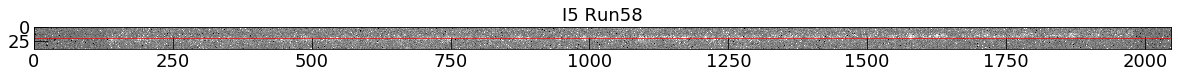

In [78]:
# track rotation *** if needed ***
my.set_atlas_style('long')

x1 = x_resolution
x0  = 0
dy0 = 20
TrInfo = []
lena = len(a0)
### Bloccato ad 1...
lena = 1
########
fig, ax = plt.subplots(lena,1)
for i in range(0, lena):
    img   = imageBare
    y0 = (d0[i] - x0 * np.cos(a0[i])) / np.sin(a0[i])
    y1 = (d0[i] - x1 * np.cos(a0[i])) / np.sin(a0[i])
    theta  = np.arctan((y1-y0)/(x1-x0))
    xP = np.int(np.abs((y0-dy0)*np.sin(theta)))
    if theta<0:
        yP = np.int(y0*np.cos(theta))
    else:
        yP = np.int(y1*np.cos(theta))
    theta = theta*(180.0/np.pi)
    imgR  = scipy.ndimage.interpolation.rotate(img, theta)
    #
    TrInfo.append([imgR[yP-dy0:yP+dy0,0:x_resolution+xP], xP, yP, theta, dy0])
    print (dy0, xP, yP)
    #
    if lena<=1:
        ax.imshow(TrInfo[i][0], vmin=85, vmax=120,  cmap="gray")
        ax.plot((0, x_resolution-1), (dy0, dy0), c[i], alpha=0.7)
    else:
        ax[i].imshow(TrInfo[i][0], vmin=85, vmax=120,  cmap="gray")
        ax[i].plot((0, x_resolution-1), (dy0, dy0), c[i], alpha=0.7)
plt.title("I%d Run%d" % (traccia, run))
plt.show()

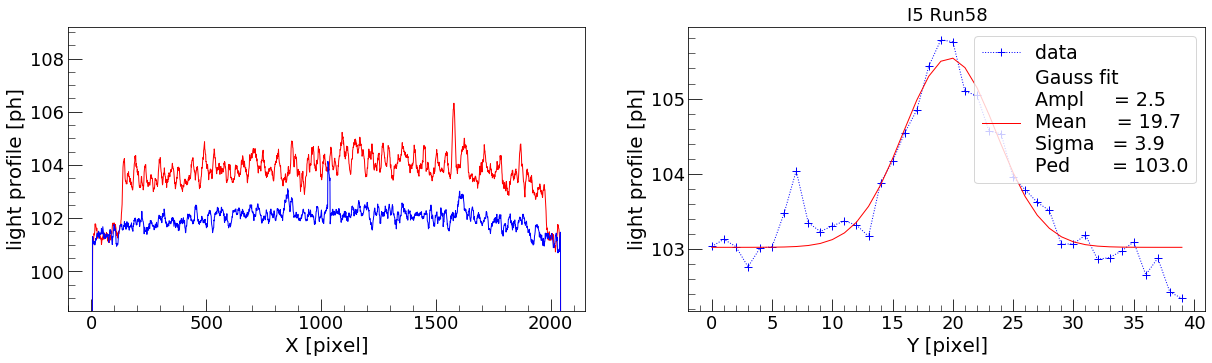

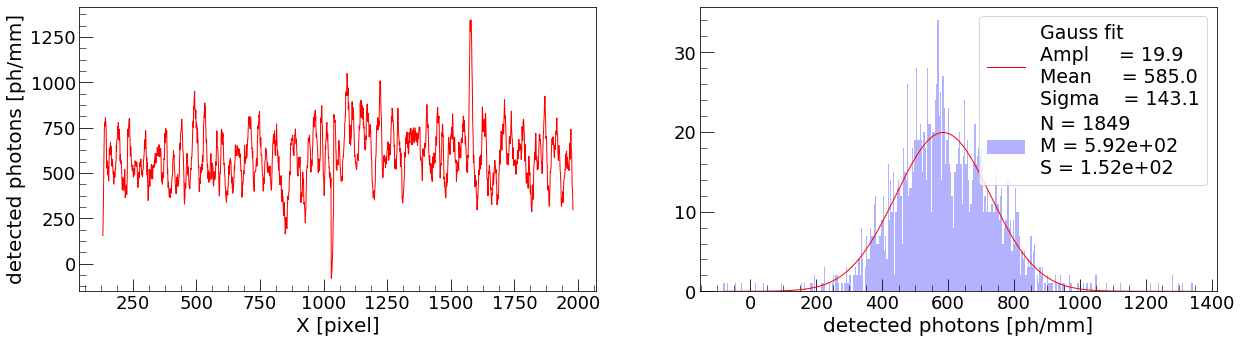

In [79]:
my.set_atlas_style('long')
#XprojTh     = 99.2
XprojTh     = 102.2
pixelscale  = 0.125 #55e-3 #Orange 0.125 for lemonn [600:750,700:1000]
#X0cutL      = 740#1000#930   # Left light cut
#X0cutR      = 1050#580#600    # Right light cut
#Y0bck       = 900  # y position from where get bckground (1800)
X0cutL      = 0  # Left light cut
X0cutR      = 0    # Right light cut
Y0bck       = 900  # y position from where get bckground (1800)

#for i in range(0, len(TrInfo)):
for i in range(0, 1):
    fig, ax = plt.subplots(1,2)
    #
    Xproj      = np.mean(TrInfo[i][0][0:dy0*2,X0cutL:x_resolution-X0cutR], axis=0)
    Yproj      = np.mean(TrInfo[i][0][0:dy0*2,X0cutL:x_resolution-X0cutR], axis=1)
    XInt       = np.sum(TrInfo[i][0][0:dy0*2,X0cutL:x_resolution-X0cutR], axis=0)
    XInt_bck   = np.mean(img[Y0bck-dy0:Y0bck+dy0,X0cutL:x_resolution-X0cutR], axis=0)        
    x=np.arange(X0cutL, x_resolution-X0cutR)
    #
    XprojSmoot = my.smooth(Xproj,10) # valori scelti per tagliare le code e il pixel sempre on ch ~ 2000
    # trova primo e ultimo minimo data la soglia
    ax[0].plot(x, XprojSmoot, 'r-', label='Smoot')
    XbckSmoot = my.smooth(XInt_bck,10)
    ax[0].plot(x, XbckSmoot, 'b-', label='Smoot')
    #ax[0].plot(x[100:x_resolution-50], Xproj[100:x_resolution-50], 'r-', label='Smoot')
    XprojThArr = my.OverTh2Array(XprojSmoot, XprojTh)
    #ax[0].plot((50,x_resolution-50), (XprojTh, XprojTh))
    ax[0].set_ylabel('light profile [ph]')
    ax[0].set_xlabel('X [pixel]')
    ax[0].set_ylim(98.5, )
    ax[0].minorticks_on()
    try:
        xThs = XprojThArr[0][0]
    except:
        print("xThs error")
    if xThs == 0:
        xThs = 0
    try:
        xThe = XprojThArr[len(XprojThArr)-1][0]
    except:
        print("xThe error")
    if xThe == 0:
        xThe = len(XprojSmoot)
    x=np.arange(0, 2*dy0)
    x0 = dy0
    y0 = np.mean(Yproj)
    s0 = dy0*0.2
    a0 = max(Yproj)-y0
    ax[1].plot(x, Yproj, 'b+:', label='data')
    try:
        popt,pcov = curve_fit(my.Gauss, x, Yproj, p0=[a0, x0, s0, y0])

        ax[1].plot(x, my.Gauss(x, *popt), 'r-',
               label='Gauss fit   \nAmpl     = %.1f\nMean     = %.1f\nSigma   = %.1f\nPed       = %.1f' %
               (popt[0], popt[1], popt[2], popt[3]))
    except:
        print("fit error")
    ax[1].set_xlabel('Y [pixel]')
    ax[1].set_ylabel('light profile [ph]')
    ax[1].minorticks_on()
    plt.legend()
    plt.title("I%d Run%d" % (traccia, run))
    plt.show()
    TrInfo[i] = np.append(TrInfo[i], (xThs, xThe, popt[0], popt[2]))
    fig, ax = plt.subplots(1,2)
    x=np.arange(xThs, xThe)

    eres = (XprojSmoot[xThs:xThe]-XbckSmoot[xThs:xThe])*2*dy0/pixelscale

    ax[0].plot(x, eres, 'r-', label='Smoot')
    ax[0].set_ylabel('detected photons [ph/mm]')
    ax[0].set_xlabel('X [pixel]')
    ax[0].minorticks_on()
    bins = int(eres.size/5)
    ax[1].hist(eres, bins=bins, color='blue', alpha=0.3, label='N = %d\nM = %.2e\nS = %.2e' % 
           (np.size(eres), np.mean(eres), np.sqrt(np.var(eres))))
    x = np.linspace(eres.min(), eres.max(), bins)
    y, _ = np.histogram(eres, bins=bins)
    try:
        popt,pcov = curve_fit(my.Gauss3, x, y, p0=[100, np.mean(eres), 100.0])
        x = np.linspace(eres.min(), eres.max(), bins*4)
        ax[1].plot(x, my.Gauss3(x, *popt), 'r-',
               label='Gauss fit   \nAmpl     = %.1f\nMean     = %.1f\nSigma    = %.1f' %
               (popt[0], popt[1], popt[2]))
    except:
        print("fit error")

    ax[1].set_xlabel('detected photons [ph/mm]')
    ax[1].minorticks_on()
    ax[1].legend()

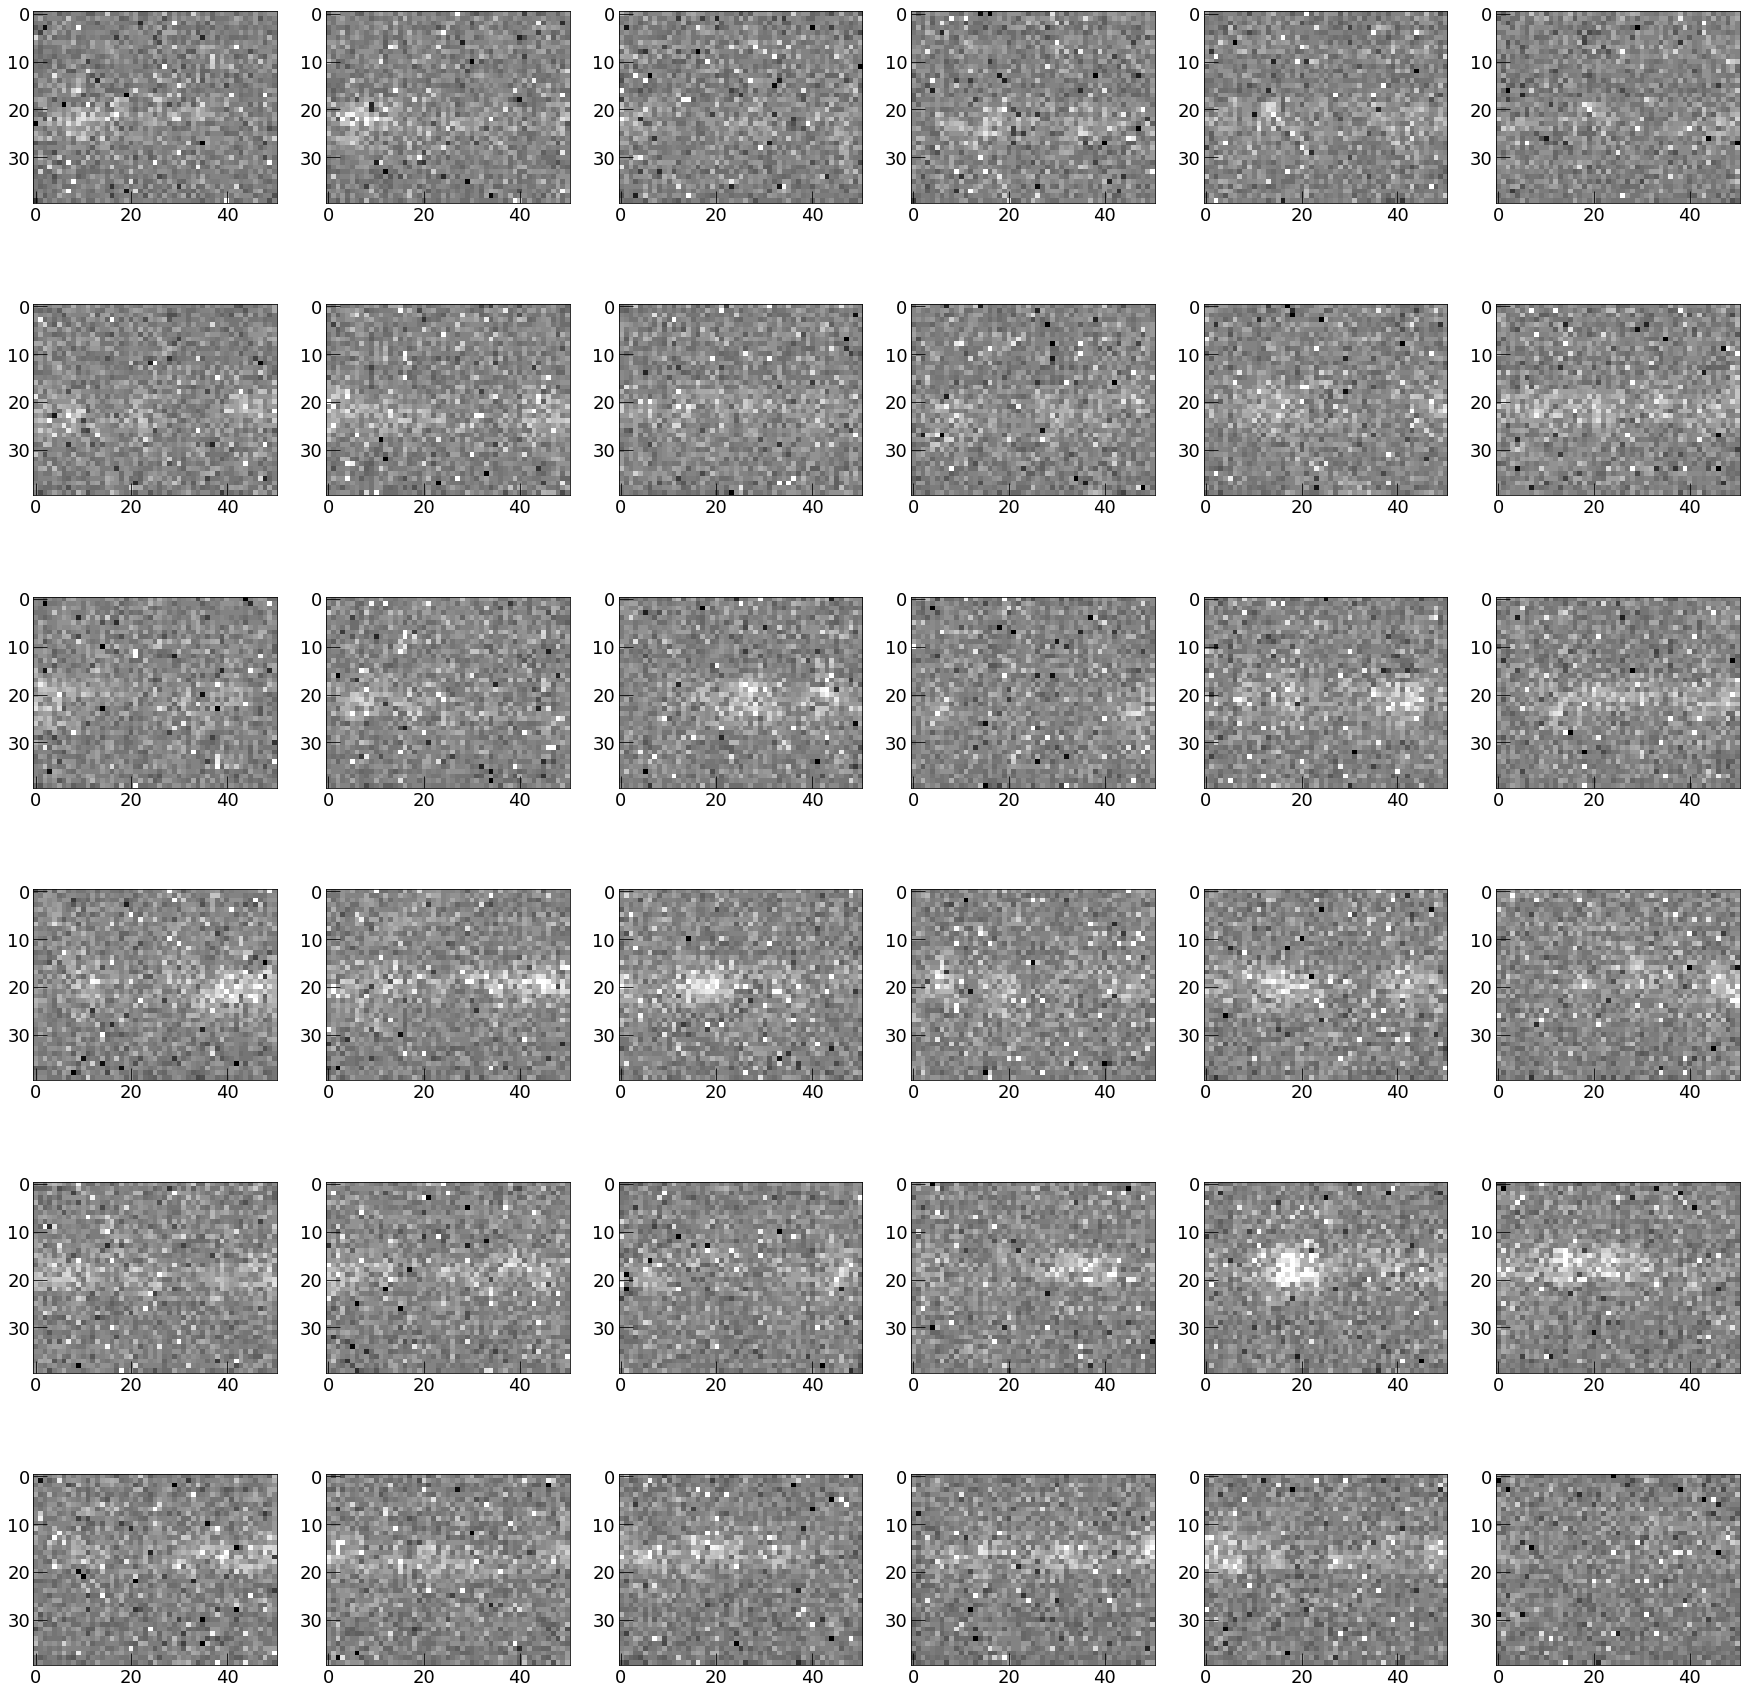

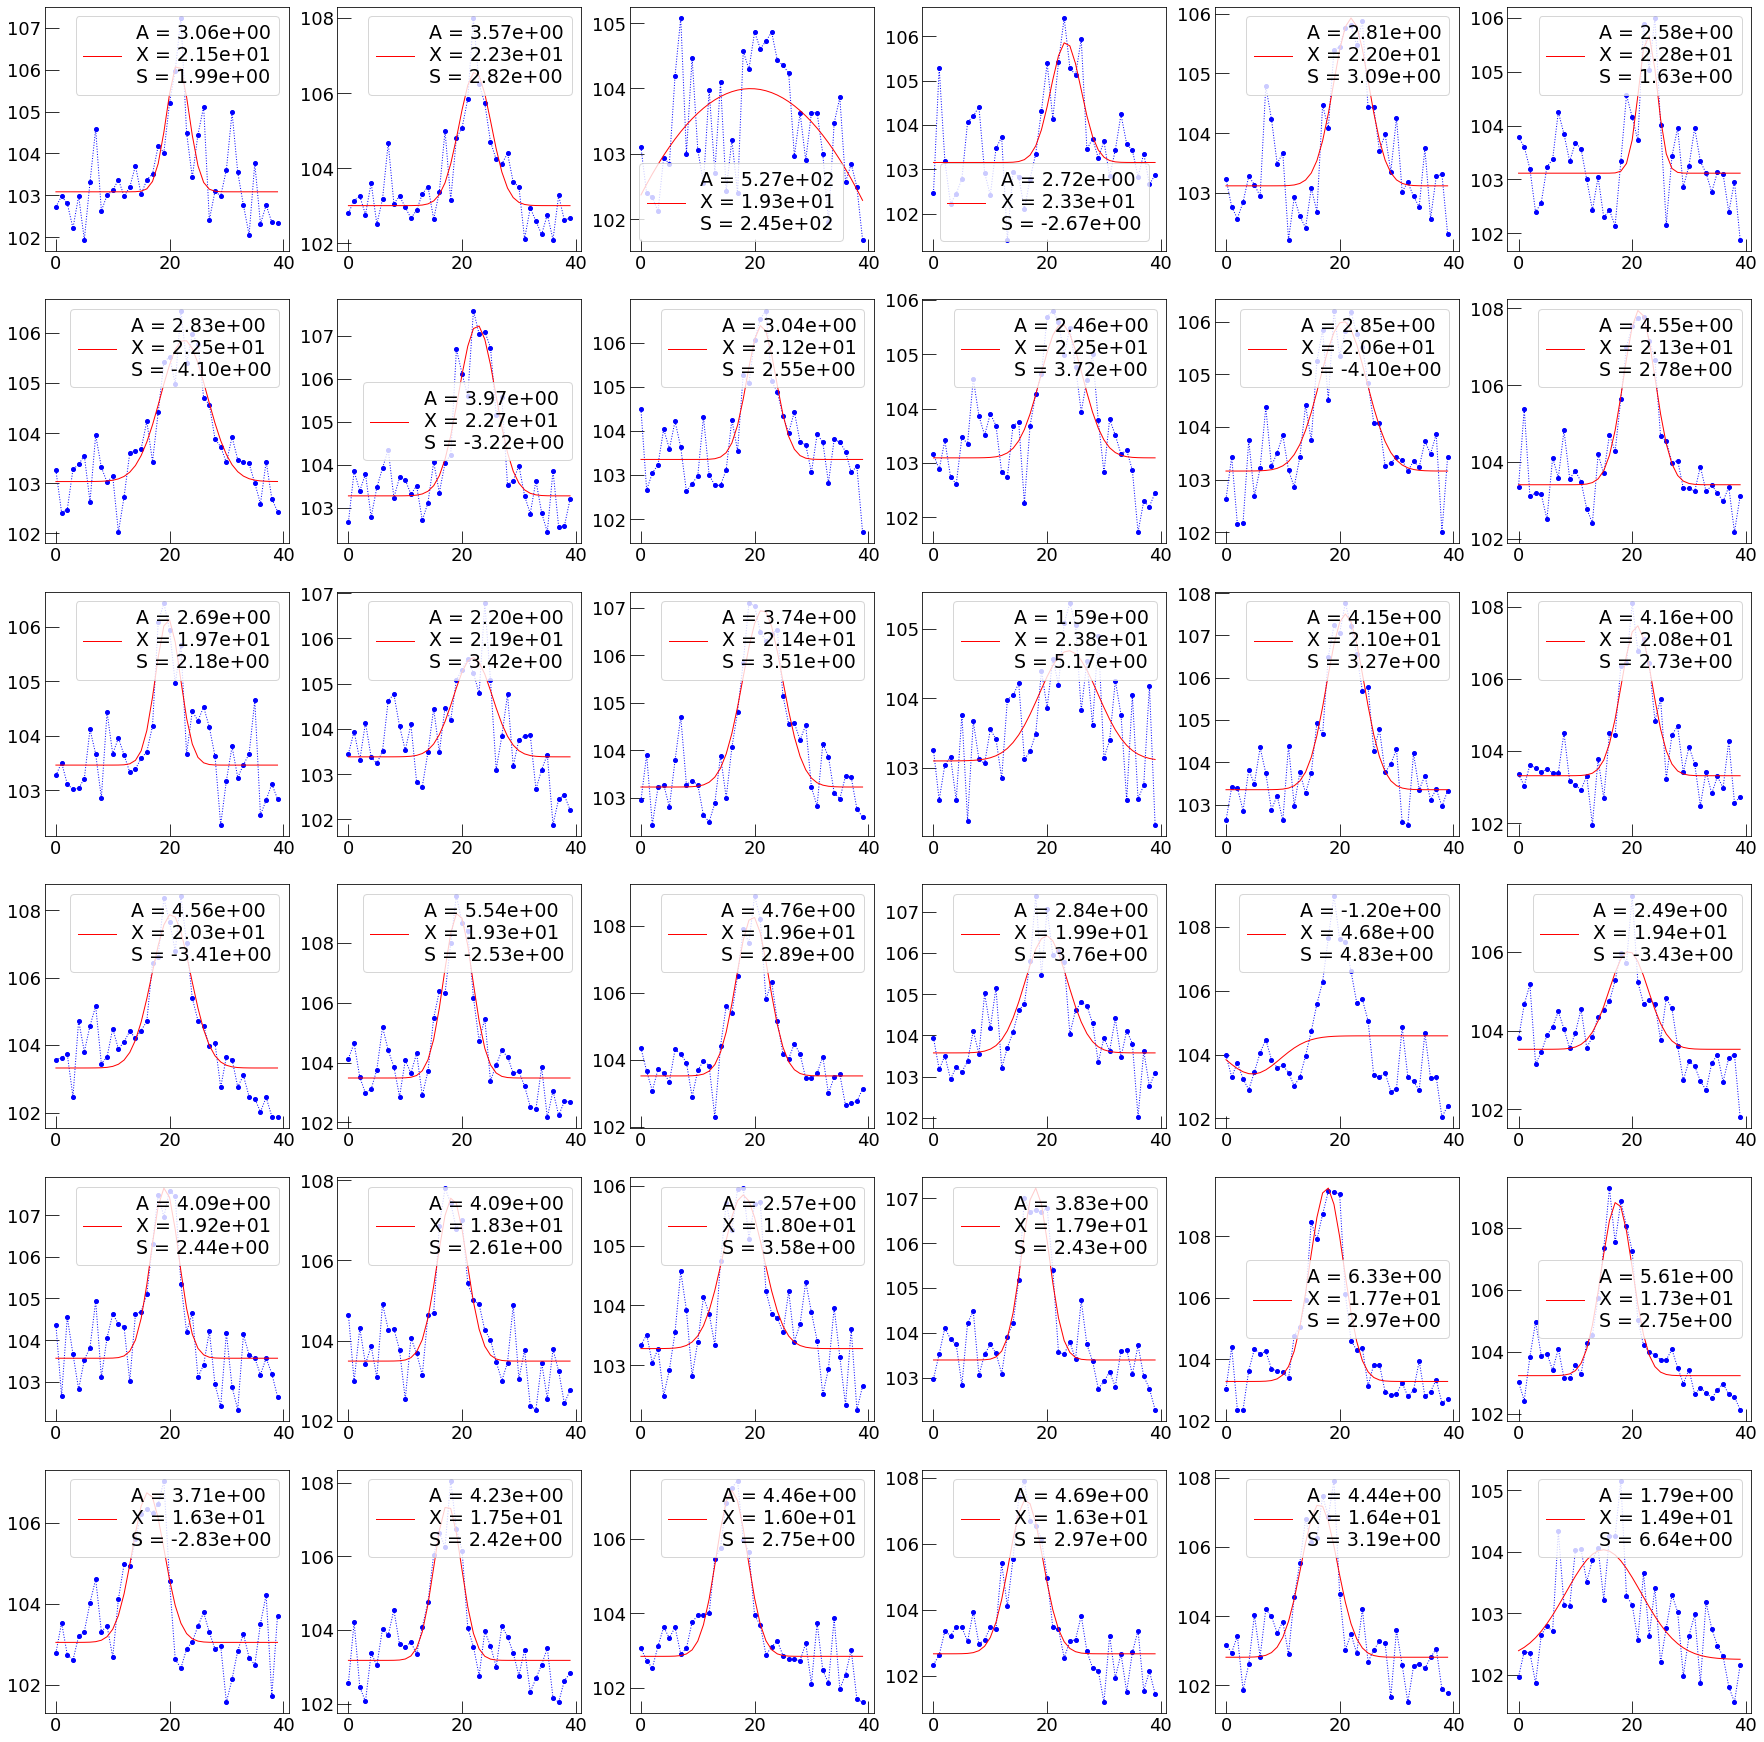

In [69]:
my.set_atlas_style('xlarge')
# for i in range(0, len(TrInfo)):
for i in range(0, 1):
    nslide    = 6
    slide     = np.int((TrInfo[i][6]-TrInfo[i][5])/(nslide*nslide))
    f, axarr  = plt.subplots(nslide, nslide)
    e_slide   = np.int(TrInfo[i][5])
    xs = np.arange(0, dy0*2)
    for j in range(0, nslide):
        for k in range(0, nslide):
            s_slide = e_slide 
            e_slide = s_slide + slide
            axarr[j, k].imshow(TrInfo[i][0][0:,s_slide:e_slide], 
                               vmin=85, vmax=120,  cmap="gray")

    plt.show()
    f, axarr  = plt.subplots(nslide, nslide)
    e_slide   = np.int(TrInfo[i][5])
#
    ta        = np.zeros(nslide*nslide)
    tx        = np.zeros(nslide*nslide)
    ts        = np.zeros(nslide*nslide)
    ji        = 0
#
    plt.rcParams['figure.figsize'] = (30.0, 30.0)
    for j in range(0, nslide):
        for k in range(0, nslide):
            s_slide = e_slide 
            e_slide = s_slide + slide
            y  = np.mean(TrInfo[i][0][0:,s_slide:e_slide], axis=1)
            x0 = np.argmax(y)
            y0 = np.mean(y)
            s0 = 10.
            a0 = max(y)-y0
            try:
                popt,pcov = curve_fit(my.Gauss, xs, y, p0=[a0, x0, s0, y0])
                perr = np.sqrt(np.diag(pcov))
                # print perr
            except:
                print("Unable to fit data...")

            axarr[j, k].plot(xs, y, 'b:.')
            axarr[j, k].plot(xs, my.Gauss(xs, *popt), 'r-', label='A = %.2e\nX = %.2e\nS = %.2e' % (popt[0],popt[1], popt[2]))
            axarr[j, k].legend()
            if perr[0]<10:
                ta[ji] = abs(popt[0])
                tx[ji] = abs(popt[1])
                ts[ji] = abs(popt[2])
            ji+=1
    plt.show()


No handles with labels found to put in legend.


P1= 4.46e-01 ± 7.71e-02 P2= 2.25e+01 ± 1.76e+00 Chi2 = 44.01 p = 0.08
Gauss init: 18.00, 0.44, 5.76


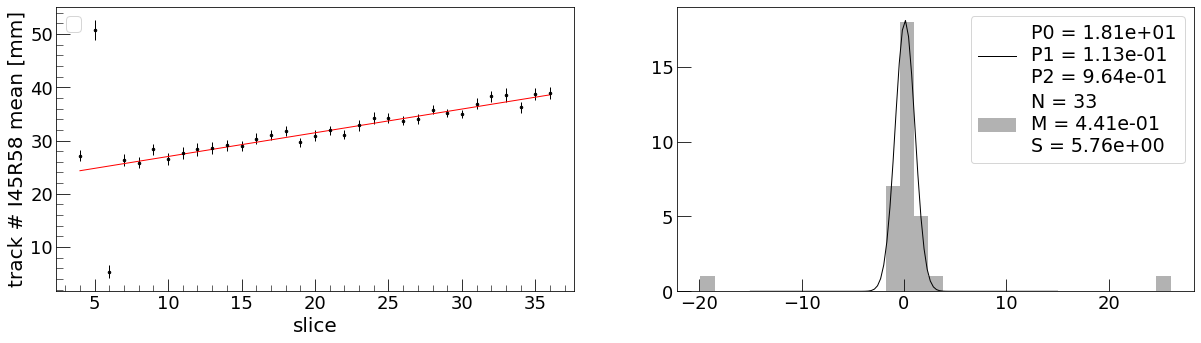

In [51]:
my.set_atlas_style('long')
#
cmin = 3
cmax = 36
x = np.linspace(1, nslide*nslide, nslide*nslide)
y = tx#[::-1] # reverse array perche'?? bho
x = x[cmin:cmax]
y = y[cmin:cmax]
# print x, y
#
e = np.std(y)/np.sqrt(abs(ts[cmin:cmax]*ta[cmin:cmax])*np.sqrt(2*np.pi))
fig, ax = plt.subplots(1,2)
ax[0].set_xlabel(r'slice')
ax[0].set_ylabel(r'track # I%dR%d mean [mm]' % (traccia, run))            
ax[0].errorbar(x, y, yerr=e, fmt='k.', markersize=5, label='')
#ax.set_ylim((0,5))
ax[0].legend(loc=2)
ax[0].minorticks_on()
popt,pcov = curve_fit(my.Line, x, y, p0=[0.0, 40], sigma=e)
perr = np.sqrt(np.diag(pcov))
fchi = chisquare(y, f_exp=my.Line(x, *popt))
ax[0].plot(x, my.Line(x, *popt), 'r', label=r'P0=%.2e P1=%.2e $\chi^2 = %.2f$'% 
       (popt[0], popt[1], fchi[0]))
print ("P1= %.2e ± %.2e P2= %.2e ± %.2e Chi2 = %.2f p = %.2f" % 
   (popt[0], perr[0], popt[1], perr[1], fchi[0],fchi[1]))

y = y - my.Line(x, *popt)

bins = y.size
x = np.linspace(y.min(), y.max(), bins)
ax[1].hist(y, bins=bins, color='gray', alpha=0.6,
                   label='N = %d\nM = %.2e\nS = %.2e' % 
                   (y.size, y.mean(), y.std()))
yh, _   = np.histogram(y, bins)

A, M, S = yh.max(), y.mean(), y.std()
print ('Gauss init: %.2f, %.2f, %.2f' % (A, M, S))

popt, pcov = curve_fit(my.Gauss3, x, yh,
                  p0=(A, M, S))
xf = np.linspace(-15, 15, 100)
#xf=x
ax[1].plot(xf, my.Gauss3(xf, *popt), 'k-', label='P0 = %.2e\nP1 = %.2e\nP2 = %.2e' % 
          (popt[0], popt[1], popt[2]))
ax[1].legend()

plt.show()


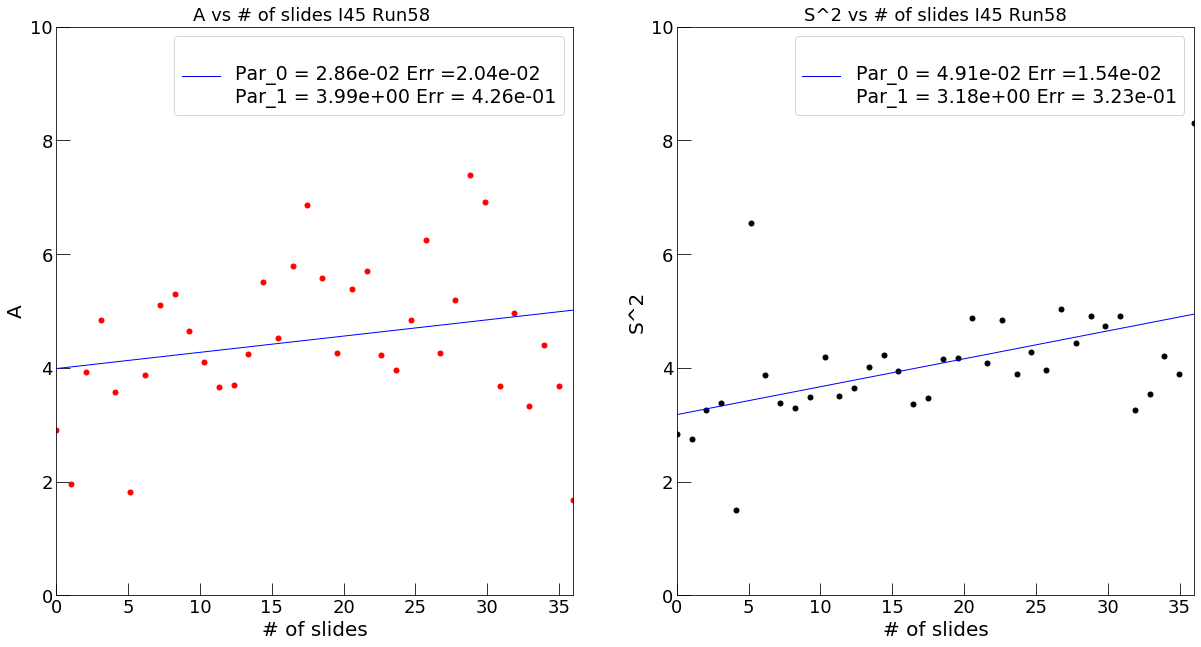

In [52]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams["font.size"] = "16"
fig, ax  = plt.subplots(1, 2)
y =  ta
x = np.linspace(0, nslide*nslide, nslide*nslide)
ax[0].plot(x, y, 'r.', markersize=10)
ax[0].set_xlabel('# of slides')
ax[0].set_ylabel('A')
ax[0].set_title("A vs # of slides I%d Run%d " % (traccia, run))
ax[0].set_xlim([0,nslide*nslide])
ax[0].set_ylim([0,10])
try:
    popt,pcov = curve_fit(my.Line, x, y)
    perr = np.sqrt(np.diag(pcov))
    ax[0].plot(x, my.Line(x, *popt), 'b', label='\nPar_0 = %.2e Err =%.2e\nPar_1 = %.2e Err = %.2e' 
             % (popt[0],perr[0], popt[1], perr[1]))
#    popt,pcov = curve_fit(my.Exp, x, y)
#    ax[0].plot(x, my.Exp(x, *popt), 'b', 
#             label='Exp fit   \nPar_0     = %.2e\nPar_1     = %.2e\nPar_2     = %.2e' 
#             % (popt[0], popt[1], popt[2]))
    ax[0].legend()

except:
    print("Data unfittable...")

y =  ts

ax[1].plot(x, y, 'k.', markersize=10)
ax[1].set_xlabel('# of slides')
ax[1].set_ylabel('S^2')
ax[1].set_title("S^2 vs # of slides I%d Run%d" % (traccia, run))
ax[1].set_xlim([0,nslide*nslide])
ax[1].set_ylim([0,10])
try:
    popt,pcov = curve_fit(my.Line, x, y)
    perr = np.sqrt(np.diag(pcov))
    ax[1].plot(x, my.Line(x, *popt), 'b', label='\nPar_0 = %.2e Err =%.2e\nPar_1 = %.2e Err = %.2e' 
             % (popt[0],perr[0], popt[1], perr[1]))
#    popt,pcov = curve_fit(my.Exp, x, y)
#    ax[1].plot(x, my.Exp(x, *popt), 'b', 
#             label='Exp fit   \nPar_0     = %.2e\nPar_1     = %.2e\nPar_2     = %.2e' 
#             % (popt[0], popt[1], popt[2]))
    ax[1].legend()


except:
    print("Data unfittable...")

plt.show()

In [53]:
# load scope HR
plt.rcParams['figure.figsize'] = (30.0, 10.0)
plt.rcParams["font.size"] = "28"
run = 196
fig, ax = plt.subplots(1,2)
t, calo  = cy.ReadScopeTrace(cy.scopeFile2FullPathCygnus(dataSelection, run, 0, 4))
t, pmt  = cy.ReadScopeTrace(cy.scopeFile2FullPathCygnus(dataSelection, run, 0, 3))
norm = 0
for traccia in xrange(1,100):
    t, c  = cy.ReadScopeTrace(cy.scopeFile2FullPathCygnus(dataSelection, run, traccia, 4))
    #print min(my.smooth(c,100)[700:2500])
    if min(my.smooth(c,100)[700:2500])<-0.1:
        calo = calo + c
        t, a  = cy.ReadScopeTrace(cy.scopeFile2FullPathCygnus(dataSelection, run, traccia, 3))
        pmt = pmt + a
        norm +=1
        #print norm
calo = calo/norm
pmt = pmt/norm
try:
    ax[0].plot(t[700:2500], calo[700:2500], 'r-', label='Calo', alpha=0.7)
    ax[0].set_xlabel('Time [s]')
    ax[0].set_ylabel('Amplitude Calorimeter [V]')
    ax[0].set_title("<I=%d> Run%d" % (norm+1, run))
    plt.ylim((-0.100,0.01))
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.plot()
    
except:
    print("Error... Calo")
try:
    ax[1].plot(t, pmt, 'b-', label='PMT', alpha=0.7)
    ax[1].set_xlabel('Time [s]')
    ax[1].set_ylabel('Amplitude PMT [V]')
    ax[1].set_title("<I=%d> Run%d" % (norm+1, run))
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#    plt.ylim((-0.100,0.01))
    plt.plot()
    
except:
    print("Error... PMT")
print np.abs(min(calo[700:2500]))    
print np.abs(min(calo[700:2500]))
index = np.argmax(my.smooth(pmt[3000:],100))
print("%d, %.6f, %.6f, %.6f %d" % 
      (run, np.abs(min(calo[700:2500])), np.abs(min(pmt[700:2500])), np.abs(min(pmt[3000:])),
      index))

SyntaxError: invalid syntax (<ipython-input-53-da950a9c40c4>, line 42)

Data unfittable...
Data unfittable...
Data unfittable...


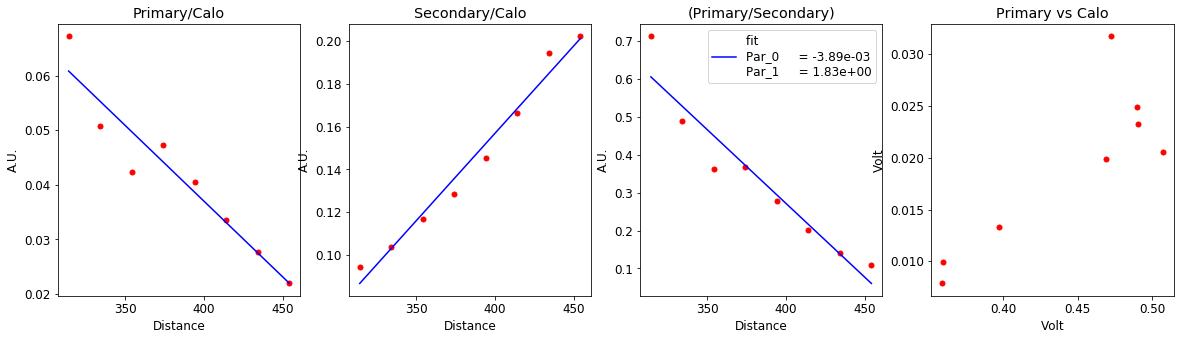

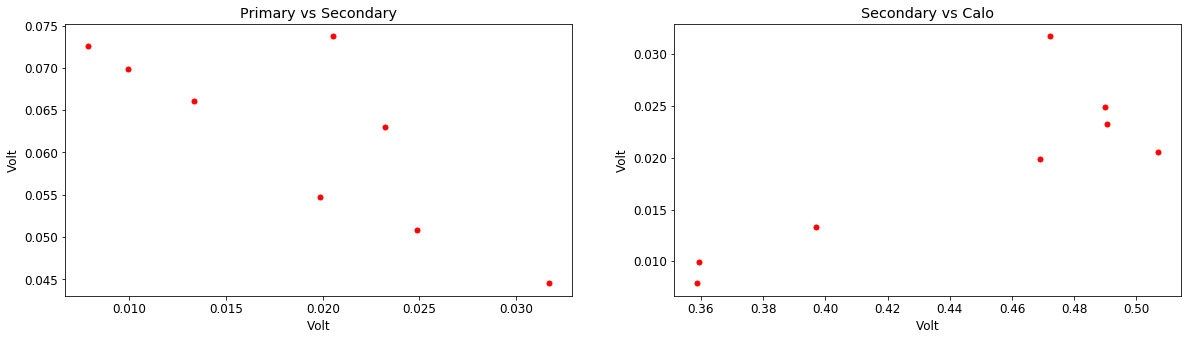

In [3]:
plt.rcParams['figure.figsize'] = (20.0, 5.0)
plt.rcParams["font.size"] = "12"
data = []
#data.append( [206, 294.2, 0.427984, 0.103916, 0.032506] )
data.append( [207, 314.2, 0.472149, 0.031723, 0.044519] )
data.append( [208, 334.2, 0.489774, 0.024895, 0.050802] )
data.append( [209, 354.2, 0.468921, 0.019851, 0.054749] )
data.append( [210, 374.2, 0.490444, 0.023224, 0.062956] )
data.append( [211, 394.2, 0.506944, 0.020514, 0.073718] )
data.append( [212, 414.2, 0.397100, 0.013326, 0.066032] )
data.append( [213, 434.2, 0.359472, 0.009922, 0.069896] )
data.append( [214, 454.2, 0.358720, 0.007860, 0.072570] )
data=np.array(data)
x = data[:,1]
y = data[:,3]/data[:,2]
fig, ax = plt.subplots(1,4)
ax[0].set_xlabel('Distance')
ax[0].set_ylabel('A.U.')
ax[0].plot(x, y, 'r.', markersize=10)
try:
    popt,pcov = curve_fit(my.Line, x, y)
    ax[0].plot(x, my.Line(x, *popt), 'b', label='fit   \nPar_0     = %.2e\nPar_1     = %.2e' % (popt[0], popt[1]))
    ax[0].set_legend()
except:
    print("Data unfittable...")
ax[0].set_title("Primary/Calo")

x = data[:,1]
y = data[:,4]/data[:,2]
ax[1].set_xlabel('Distance')
ax[1].set_ylabel('A.U.')
ax[1].plot(x, y, 'r.', markersize=10)
try:
    popt,pcov = curve_fit(my.Line, x, y)
    ax[1].plot(x, my.Line(x, *popt), 'b', label='fit   \nPar_0     = %.2e\nPar_1     = %.2e' % (popt[0], popt[1]))
    ax[1].set_legend()
except:
    print("Data unfittable...")
ax[1].set_title("Secondary/Calo")

x = data[:,1]
y = (data[:,3]/data[:,4])
ax[2].set_xlabel('Distance')
ax[2].set_ylabel('A.U.')
ax[2].plot(x, y, 'r.', markersize=10)

try:
    popt,pcov = curve_fit(my.Line, x, y)
    ax[2].plot(x, my.Line(x, *popt), 'b', label='fit   \nPar_0     = %.2e\nPar_1     = %.2e' % (popt[0], popt[1]))
    ax[2].legend()
except:
    print("Data unfittable...")

ax[2].set_title("(Primary/Secondary)")


x = data[:,2]
y = data[:,3]
ax[3].set_xlabel('Volt')
ax[3].set_ylabel('Volt')
ax[3].plot(x, y, 'r.', markersize=10)

try:
    popt,pcov = curve_fit(my.Line, x, y)
    ax[3].set_plot(x, my.Line(x, *popt), 'b', label='fit   \nPar_0     = %.2e\nPar_1     = %.2e' % (popt[0], popt[1]))
    ax[3].set_legend()
except:
    print("Data unfittable...")
ax[3].set_title("Primary vs Calo")
plt.show()
fig, ax = plt.subplots(1,2)
x = data[:,3]
y = data[:,4]
ax[0].set_xlabel('Volt')
ax[0].set_ylabel('Volt')
ax[0].plot(x, y, 'r.', markersize=10)
ax[0].set_title("Primary vs Secondary")

x = data[:,2]
y = data[:,3]
ax[1].set_xlabel('Volt')
ax[1].set_ylabel('Volt')
ax[1].plot(x, y, 'r.', markersize=10)
ax[1].set_title("Secondary vs Calo")
plt.show()


[]

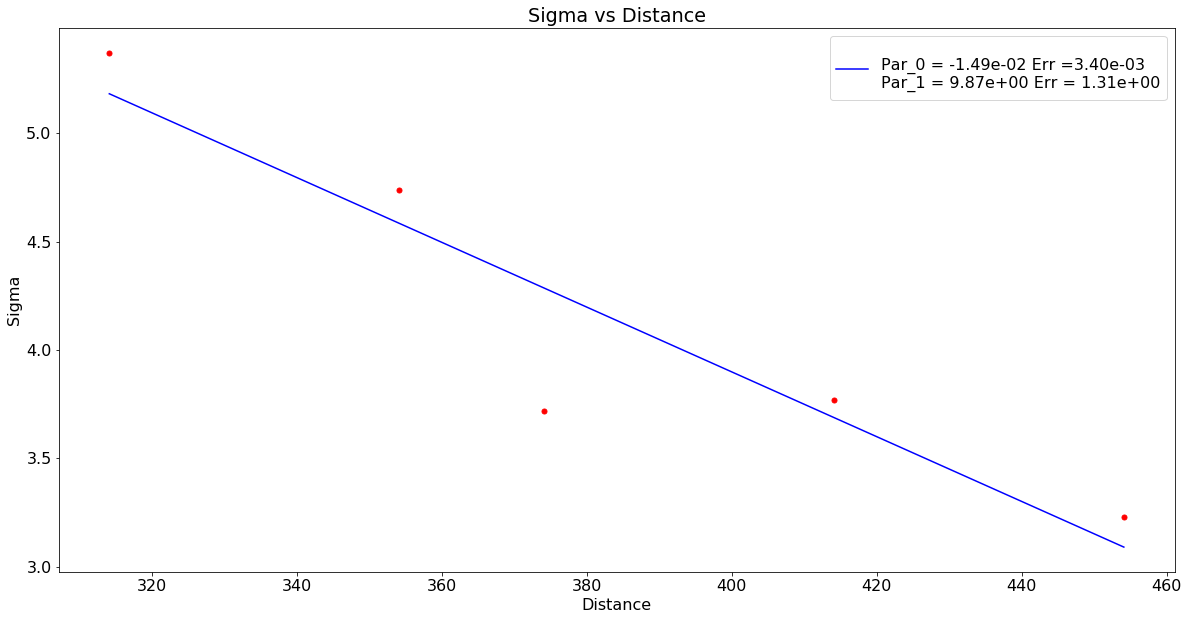

In [2]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams["font.size"] = "16"
data = []
data.append( [58, 454.1, 3.23] )
data.append( [62, 414.1, 3.77] )
data.append( [66, 374.1, 3.72] )
data.append( [70, 354.1, 4.74] )
data.append( [74, 314.1, 5.37] )
data=np.array(data)
x = data[:,1]
y = data[:,2]
fig, ax = plt.subplots()
ax.set_xlabel('Distance')
ax.set_ylabel('Sigma')
ax.plot(x, y, 'r.', markersize=10)
try:
    popt,pcov = curve_fit(my.Line, x, y)
    perr = np.sqrt(np.diag(pcov))
    ax.plot(x, my.Line(x, *popt), 'b', label='\nPar_0 = %.2e Err =%.2e\nPar_1 = %.2e Err = %.2e' 
             % (popt[0],perr[0], popt[1], perr[1]))
    ax.legend()
except:
    print("Data unfittable...")
ax.set_title("Sigma vs Distance")
plt.plot()